In [9]:
pip install langgraph langsmith

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install langchain langchain_groq langchain_community

Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 2.5/2.5 MB 20.0 MB/s  0:00:00
Using cached requests-2.32.5-py3-none-any.whl (64 kB)

  Attempting uninstall: requests

    Found existing installation: requests 2.32.4

    Uninstalling requests-2.32.4:

      Successfully uninstalled requests-2.32.4

   ----------------------------------------  0/19 [requests]
   ---- -----------------------------------  2/19 [propcache]
   ---------- -----------------------------  5/19 [marshmallow]
   -------------- -------------------------  7/19 [frozenlist]
   --------------------- ------------------ 10/19 [yarl]
   --------------------------- ------------ 13/19 [pydantic-settings]
   ----------------------------- ---------- 14/19 [groq]
   ----------------------------- ---------- 14/19 [groq]


In [ ]:
groq_api_key=''
langsmith=''

In [12]:
from langchain_groq import ChatGroq

In [13]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001F6FE165400>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001F6FE165FD0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [14]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [15]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [16]:
graph_builder

In [17]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [18]:
graph_builder.add_node("chatbot",chatbot)

In [19]:
graph_builder

In [20]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [21]:
graph=graph_builder.compile()

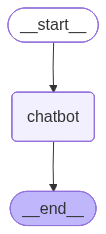

In [22]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass 

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content="Please provide me with a prompt or question so I can assist you. \n\nFor example, you could ask me:\n\n* To write a story\n* To summarize a news article\n* To translate a phrase\n* To answer a factual question\n* To generate creative content\n\n\nI'm ready to help! 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 9, 'total_tokens': 77, 'completion_time': 0.123636364, 'prompt_time': 0.001183959, 'queue_time': 0.252365291, 'total_time': 0.124820323}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--e028b96b-3a73-485c-b39a-d0442a1ea8a5-0', usage_metadata={'input_tokens': 9, 'output_tokens': 68, 'total_tokens': 77})}])
content="Please provide me with a prompt or question so I can assist you. \n\nFor example, you could ask me:\n\n* To write a story\n* To summarize a news article\n* To transl